# Passband comparison - Subaru

## Purpose

Compare rest-frame UBV colors to observed passbands for CLASH SUBARU data.

In [20]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [21]:
from astropy.io import ascii

## Display Bessel passbands in rest frame

In [22]:
def getBessel( infile):
    data = ascii.read(infile)

    passband = dict()
    passband['wavelength'] = data['col1']
    passband['transmission'] = data['col2']
    
    return passband

In [23]:
dir = 'bessel/'
U = getBessel( dir+'bess-u.pass')
B = getBessel( dir+'bess-b.pass')
V = getBessel( dir+'bess-v.pass')
R = getBessel( dir+'bess-r.pass')
I = getBessel( dir+'bess-i.pass')

In [24]:
def plotPassbands( passbands, labels, wMin=None, wMax=None, title=None):

    plt.figure(figsize=(12,6))
    
    for p,l in zip(passbands,labels):
        w = p['wavelength']
        t = p['transmission']
        plt.plot(w,t,label=l)
    
    # apply optional axis limits...
    if wMin:
        plt.xlim(xmin=wMin) 
    if wMax:
        plt.xlim(xmax=wMax)
        
    leg=plt.legend()
        
    if title:
        plt.title( title)

    # show plot...
    plt.show()

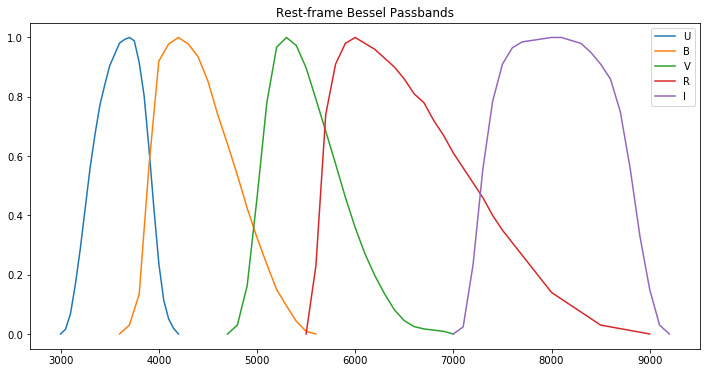

In [25]:
plotPassbands([U,B,V,R,I], labels=['U','B','V','R','I'], title='Rest-frame Bessel Passbands')

## Display Subaru passbands

In [26]:
def getSubaru( infile):
    '''
    Returns wavelength and transmission from chip 1.
    '''
    data = ascii.read(infile, data_start=1)

    passband = dict()
    passband['wavelength'] = data['col1']
    passband['transmission'] = data['col2']
    
    return passband

In [27]:
dir = 'Subaru/'
Subaru_B  = getSubaru( dir+'B_subaru.res')
Subaru_V  = getSubaru( dir+'V_subaru.res')
Subaru_g  = getSubaru( dir+'g_subaru.res')
Subaru_r  = getSubaru( dir+'r_subaru.res')
Subaru_i  = getSubaru( dir+'i_subaru.res')
Subaru_z  = getSubaru( dir+'z_subaru.res')
Subaru_z2 = getSubaru( dir+'suprime_FDCCD_z.res')

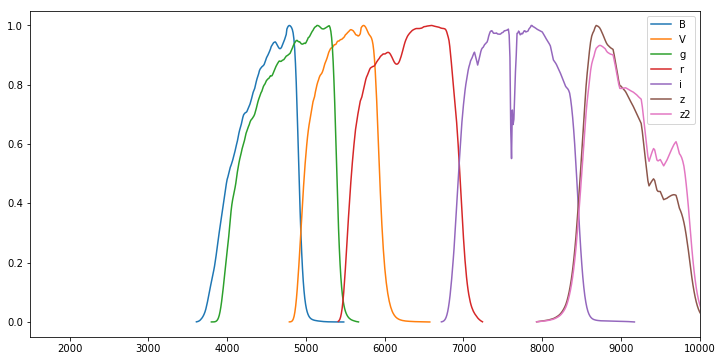

In [28]:
Subaru = [Subaru_B, Subaru_V, Subaru_g, Subaru_r, Subaru_i, Subaru_z, Subaru_z2]
labels = ['B','V','g','r','i','z','z2']
plotPassbands( Subaru, labels, wMin=1500., wMax=10000.)

## Compare redshifted UBV to Subaru passbands

In [29]:
def redshiftPassband( p, z):
    p2 = dict()
    p2['wavelength'] = (1+z)*p['wavelength']
    p2['transmission'] = p['transmission']
    return p2

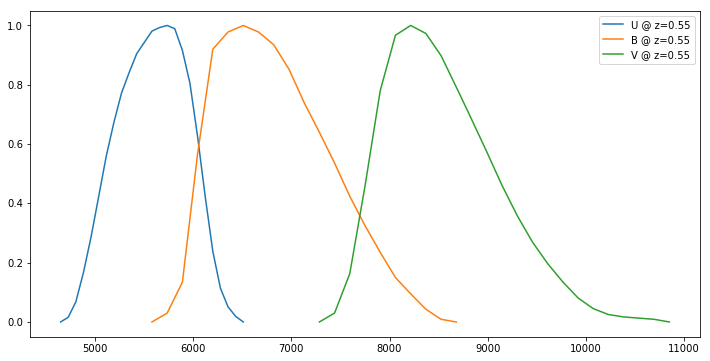

In [30]:
z = 0.55
Uz = redshiftPassband( U, z)
Bz = redshiftPassband( B, z)
Vz = redshiftPassband( V, z)
legend=['U @ z=0.55', 'B @ z=0.55', 'V @ z=0.55']
plotPassbands([Uz,Bz,Vz], legend)

In [31]:
def plotRedshiftedPassbands( passbands, shiftedPassbands, wMin=None, wMax=None, labels=None, shiftedLabels=None):

    plt.figure(figsize=(12,6))

    for p,l in zip(passbands,labels):
        w = p['wavelength']
        t = p['transmission']
        plt.plot(w,t,label=l)
        
    for p,l in zip(shiftedPassbands,shiftedLabels):
        w = p['wavelength']
        t = p['transmission']
        plt.plot(w,t,linestyle='--',label=l)
    
    # apply optional axis limits...
    if wMin:
        plt.xlim(xmin=wMin) 
    if wMax:
        plt.xlim(xmax=wMax)
        
    leg=plt.legend()

    # show plot...
    plt.show()

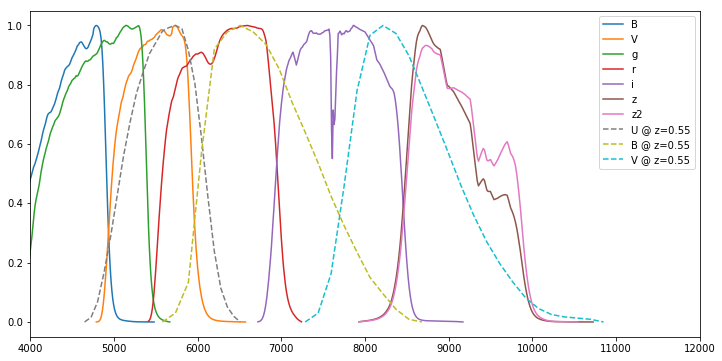

In [32]:
observed = [Subaru_B, Subaru_V, Subaru_g, Subaru_r, Subaru_i, Subaru_z, Subaru_z2]
labels = ['B','V','g','r','i','z','z2']

rest = [Uz,Bz,Vz]
shiftedLabels = ['U @ z=0.55','B @ z=0.55','V @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=4000, wMax=12000, labels=labels, shiftedLabels=shiftedLabels)

## Compare U band

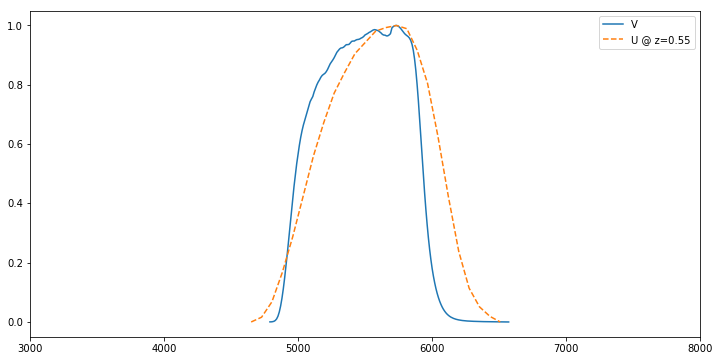

In [33]:
observed = [Subaru_V]
labels = ['V']
rest = [Uz]
shiftedLabels = ['U @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=3000, wMax=8000, labels=labels, shiftedLabels=shiftedLabels)

Conclusion: Subaru V appears to be the optimal magnitude to transform to get rest-frame U.

##  Compare B band

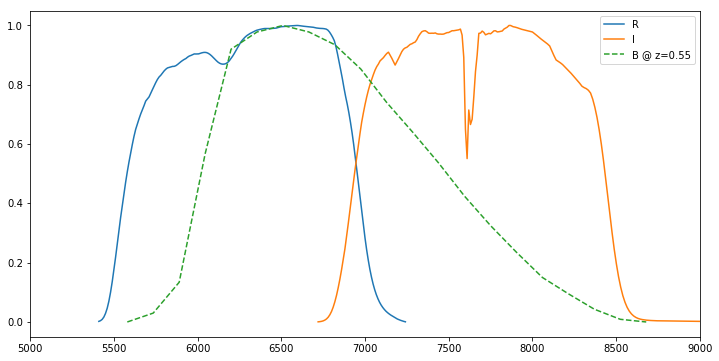

In [34]:
observed = [ Subaru_r, Subaru_i]
labels = ['R', 'I']
rest = [Bz]
shiftedLabels = ['B @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=5000, wMax=9000, labels=labels, shiftedLabels=shiftedLabels)

Conclusion: Subaru R appears to be the optimal band to transform to obtain rest-frame B.

## Compare V band

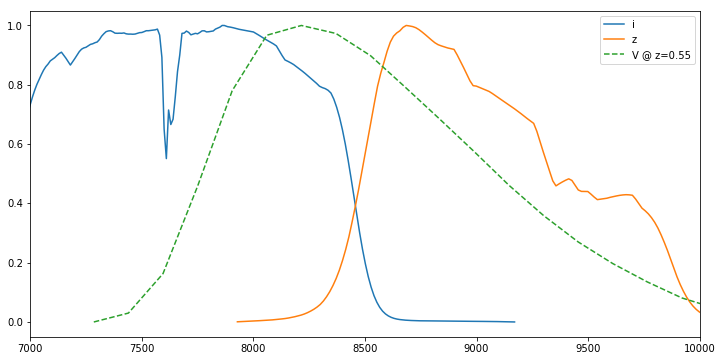

In [35]:
observed = [ Subaru_i, Subaru_z]
labels = [ 'i', 'z']
rest = [Vz]
shiftedLabels = ['V @ z=0.55']
plotRedshiftedPassbands( observed, rest, wMin=7000, wMax=10000, labels=labels, shiftedLabels=shiftedLabels)

Conclusion: both Subaru i and z contribute to rest-frame V